<a href="https://colab.research.google.com/github/EmilyChakra/FestivalCommerce/blob/main/Dewali_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Intorduction**
  - **Analyzing Diwali sales behavior** through a dataset offers valuable
       insights into consumer behavior and market trends during this festive period.
  
 - By delving into this dataset, analysts can uncover patterns in purchasing habits, identify popular product categories, and understand regional preferences.
  
 - The dataset may reveal a surge in sales during Diwali, indicating the significance of this festival in driving consumer spending.

 - Exploring factors such as demographic trends, regional variations, and product preferences can provide a comprehensive understanding of consumer behavior during this festive season.
  
- Through data analysis, **businesses can strategize marketing campaigns, optimize inventory, and tailor offerings to meet the demands of consumers during this significant period of heightened economic activity**.








##**1. Importing Libraries**

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## **2. Data Acquisition & Description**

In [3]:
# Try reading with 'latin-1' encoding
DS = pd.read_csv('/content/Diwali Sales.csv', encoding='latin-1')

# Process the DataFrame or check its content


In [ ]:
DS.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
DS.shape

(11251, 15)

###**2.1 Data Information**

In [ ]:
DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


**Observation**
1. 15 columns and 11251 rows.
2. Status and Unnamed1 are blank columns we should drop.
3. Amount have few null values.




## **2.2 Data Descibtion**

In [ ]:
DS.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


**Obsrvation**
1. Amount have Outlier must check.
2. Age also have outlier must check.



In [ ]:
DS.nunique()    # to find unique values

User_ID             3755
Cust_name           1250
Product_ID          2351
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6584
Status                 0
unnamed1               0
dtype: int64

## **3. Data Clearning**

In [4]:
DS.drop(['Status', 'unnamed1'], axis=1, inplace= True )      # Drop the blank columns

In [5]:
DS.head(1)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0


In [7]:
pd.isnull(DS).sum()    # check the null values

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# the missing 'Amount' fill with  mean value
mean_amount= DS['Amount'].mean()
DS['Amount'].fillna(mean_amount, inplace=True)

In [9]:
pd.isnull(DS).all()

User_ID             False
Cust_name           False
Product_ID          False
Gender              False
Age Group           False
Age                 False
Marital_Status      False
State               False
Zone                False
Occupation          False
Product_Category    False
Orders              False
Amount              False
dtype: bool

## **5. Exploratory Data Analysis**

In [ ]:
DS.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

###**5.1 Gender**

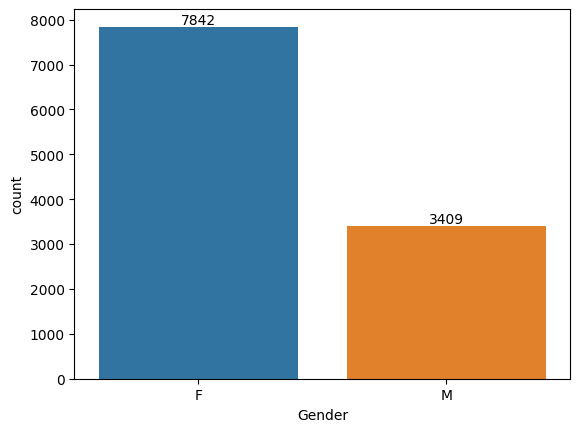

In [ ]:
Gender =sns.countplot(x= 'Gender', data= DS)
for bars in Gender.containers:
  Gender.bar_label(bars)

plt.show()

In [ ]:
DS.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,7.443039e+07
1,M,3.193218e+07


In [ ]:
# Assuming counts of males and females are available
male_count = 3409 # Replace this with the actual count of males
female_count = 7842  # Replace this with the actual count of females

# Total amounts for males and females
total_male_amount = 3.193218e+07  # Replace this with the total amount for males
total_female_amount = 7.443039e+07  # Replace this with the total amount for females

# Calculate per head amount
per_head_male_amount = total_male_amount / male_count
per_head_female_amount = total_female_amount / female_count

print("Per head amount for males:", per_head_male_amount)
print("Per head amount for females:", per_head_female_amount)

Per head amount for males: 9367.022587268993
Per head amount for females: 9491.250956388676


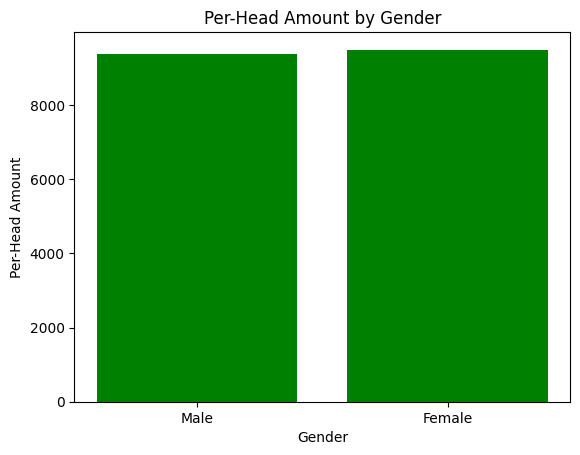

In [ ]:
Gender= ['Male', 'Female']
per_head_amount =[per_head_male_amount, per_head_female_amount]
plt.bar(Gender, per_head_amount, color='g')
plt.xlabel('Gender')
plt.ylabel('Per-Head Amount')
plt.title('Per-Head Amount by Gender')
plt.show()

### **EDA Observation 1**
**As per graph women shoping more than men, but shoping amount per head allmost same.**

### **5.2 Age**

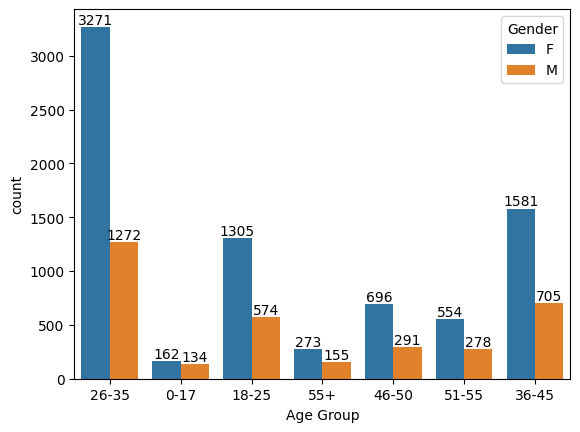

In [ ]:
Age=sns.countplot(data=DS, x='Age Group', hue='Gender')   # Depending on age, gender, and sales behavior.

for bars in Age.containers:
  Age.bar_label(bars)

### **EDA Observation 2**
  **1. Most of the sales were done by the age group 26–35 and gender female.**

  **2. The fewer sales done by two age groups: 1. 55+ and 2. 0–17 age groups.**

###**5.3 State**

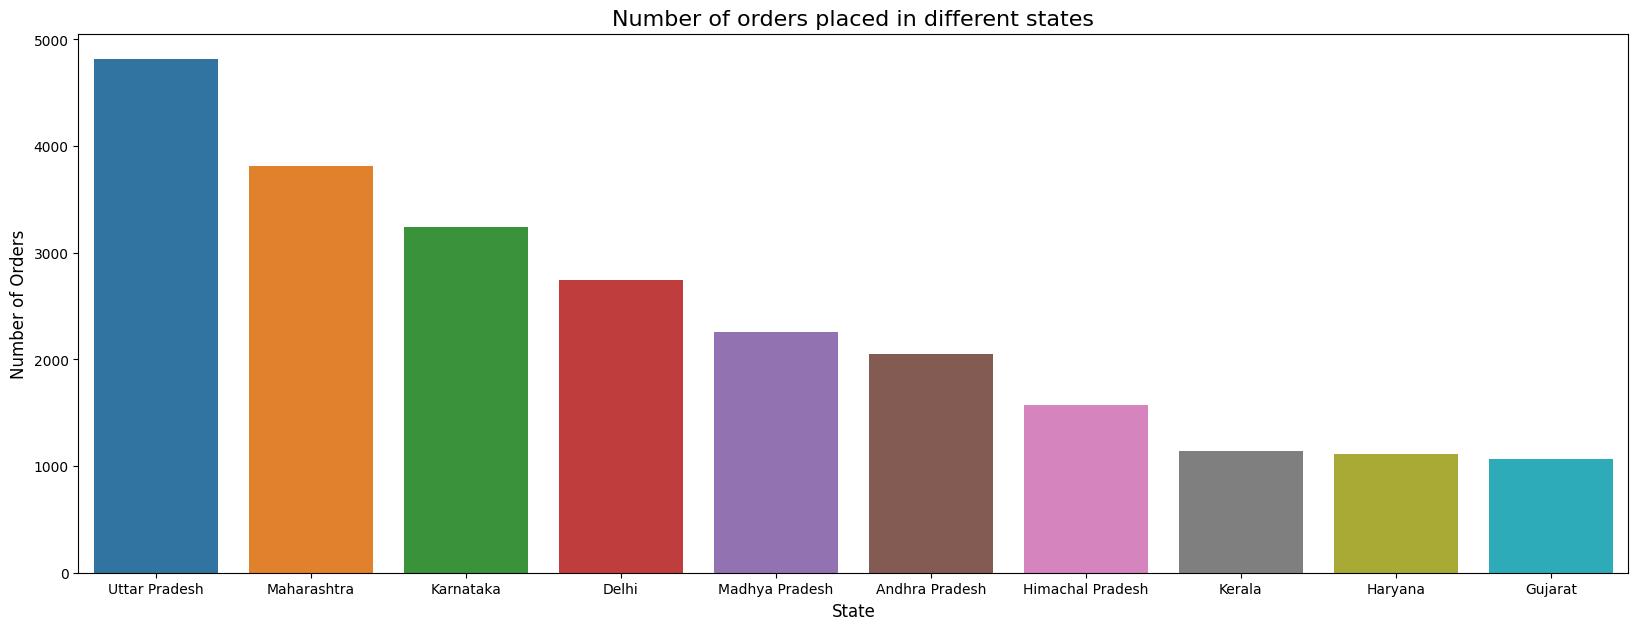

In [ ]:
State= DS.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
paper= plt.figure(figsize=[20,7])


sns.barplot(data=State, x='State', y='Orders')
plt.title('Number of orders placed in different states', size=16)
plt.xlabel('State', size=12)
plt.ylabel('Number of Orders', size=12)
plt.show()



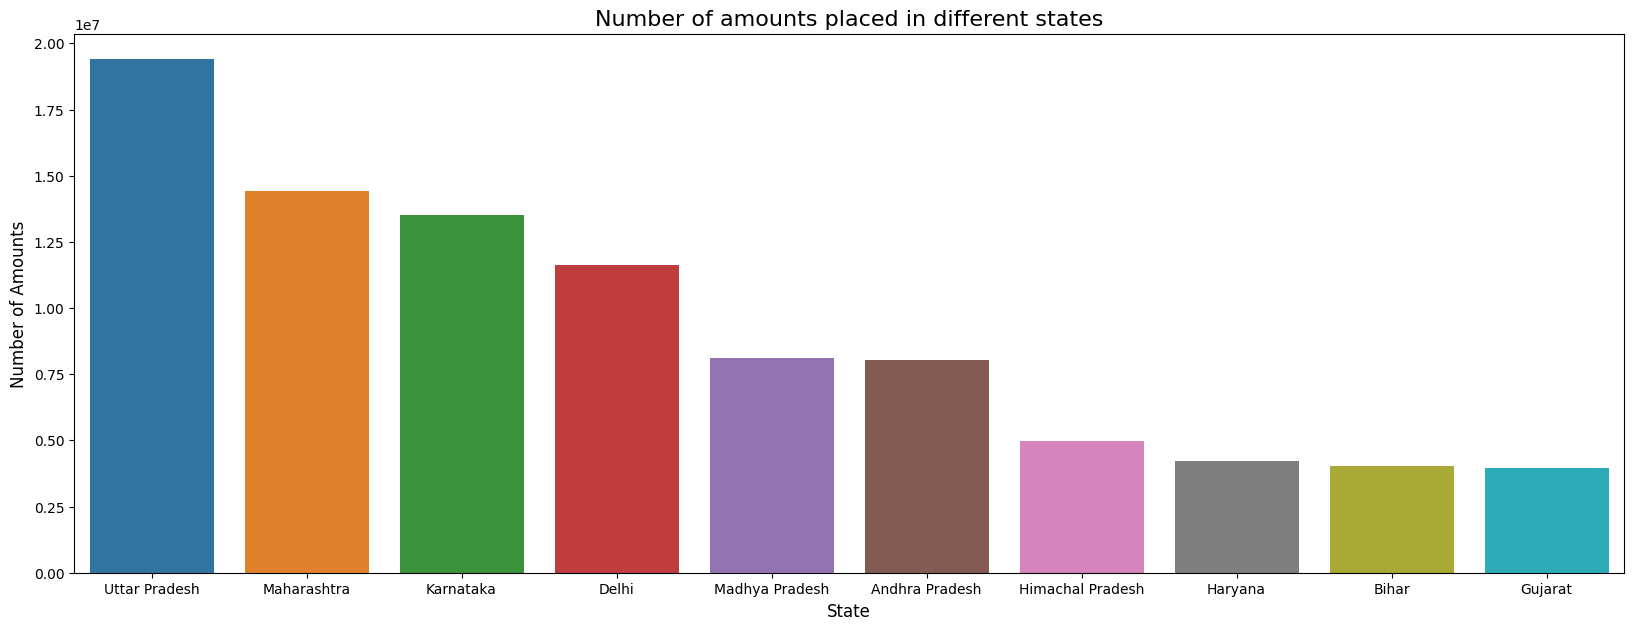

In [ ]:
State= DS.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
paper= plt.figure(figsize=[20,7])


sns.barplot(data=State, x='State', y='Amount')
plt.title('Number of amounts placed in different states', size=16)
plt.xlabel('State', size=12)
plt.ylabel('Number of Amounts', size=12)
plt.show()


### **EDA Observation 3**
  **1. Highest purchase done by Uttar Pradesh.**

###**5.4 Marital Status**

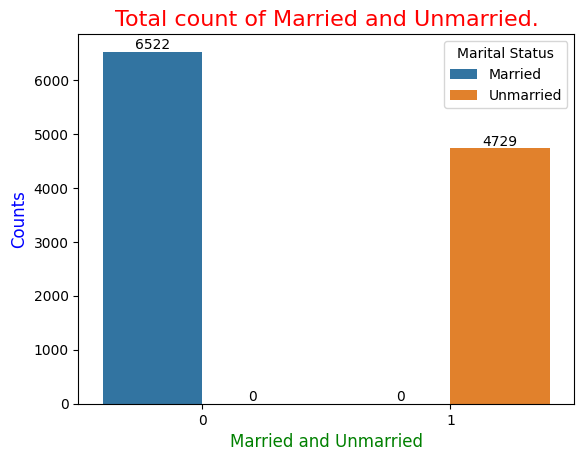

In [ ]:
hue_order = [0, 1]
labels = ['Married', 'Unmarried']

MS= sns.countplot(data=DS, x='Marital_Status', hue='Marital_Status', hue_order=hue_order)

for bars in MS.containers:
  MS.bar_label(bars)

plt.title('Total count of Married and Unmarried.', size=16, color='r')
plt.xlabel('Married and Unmarried', size=12, color='g')
plt.ylabel('Counts', size=12, color='b')

plt.legend(title='Marital Status', labels=labels)
plt.show()



### **EDA Observation 4**
**1. Married person buy more than unmarried.**

###**5.4 Occupation**

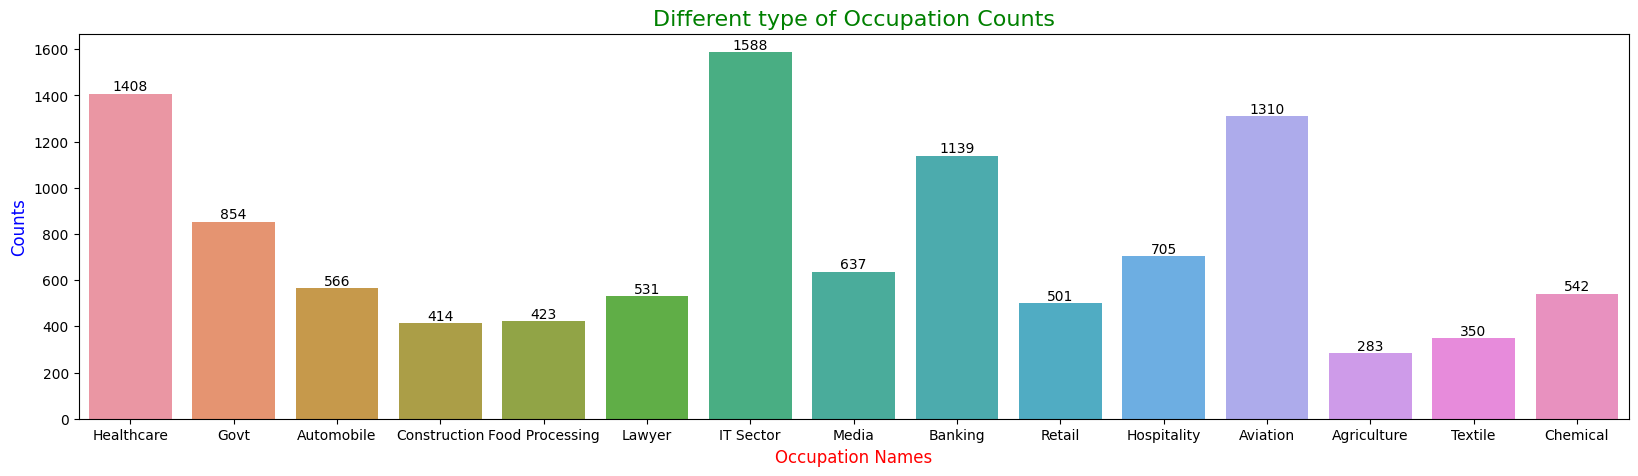

In [ ]:
paper=plt.figure(figsize=[20,5])

Occupation=sns.countplot(data=DS, x='Occupation')

for bars in Occupation.containers:
  Occupation.bar_label(bars)
plt.xlabel('Occupation Names', size=12, color='r')
plt.ylabel('Counts', size=12, color='b')
plt.title('Different type of Occupation Counts', size=16, color='g')
plt.show()

### **EDA Observation 5**
  **1. The highest purchase seems to be made by IT sector people.**

  **2. Next, followed by healthcare and avaition.**


###**5.5 Product Category**

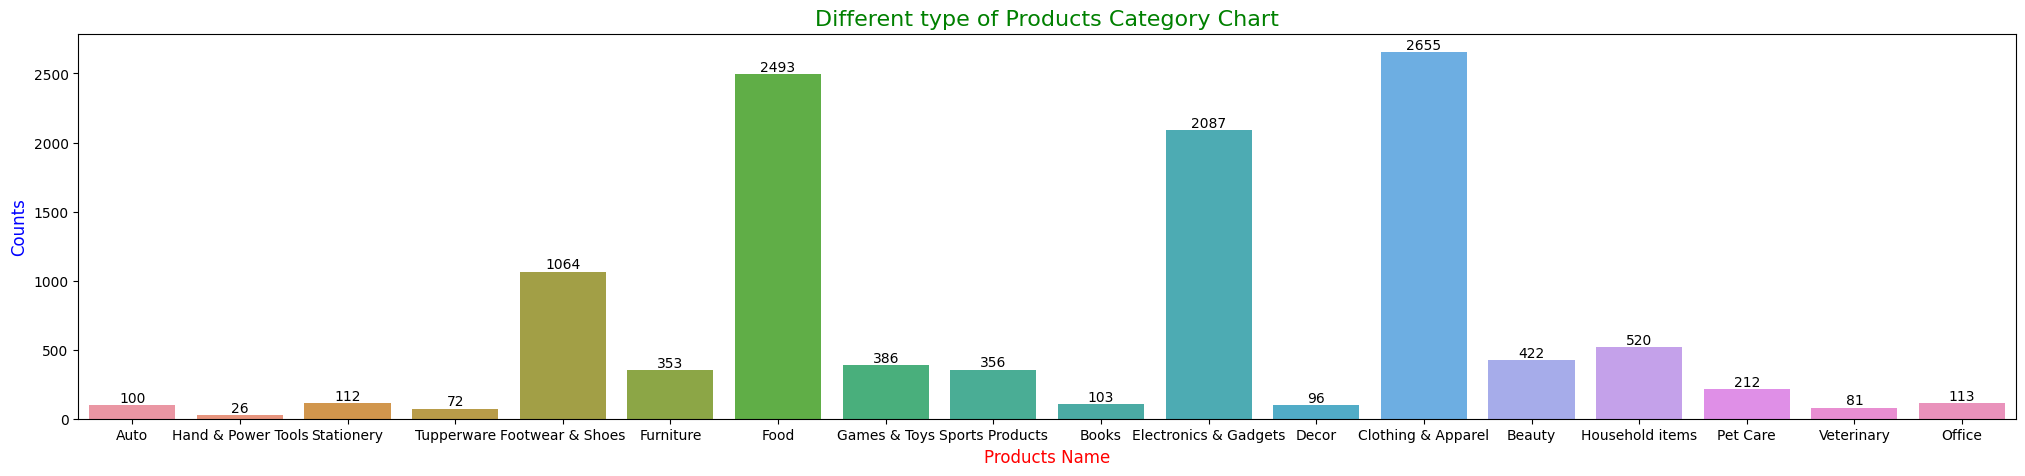

In [ ]:
paper=plt.figure(figsize=[25,5])

Product=sns.countplot(data=DS, x='Product_Category')

for bars in Product.containers:
  Product.bar_label(bars)
plt.xlabel('Products Name', size=12, color='r')
plt.ylabel('Counts', size=12, color='b')
plt.title('Different type of Products Category Chart', size=16, color='g')
plt.show()

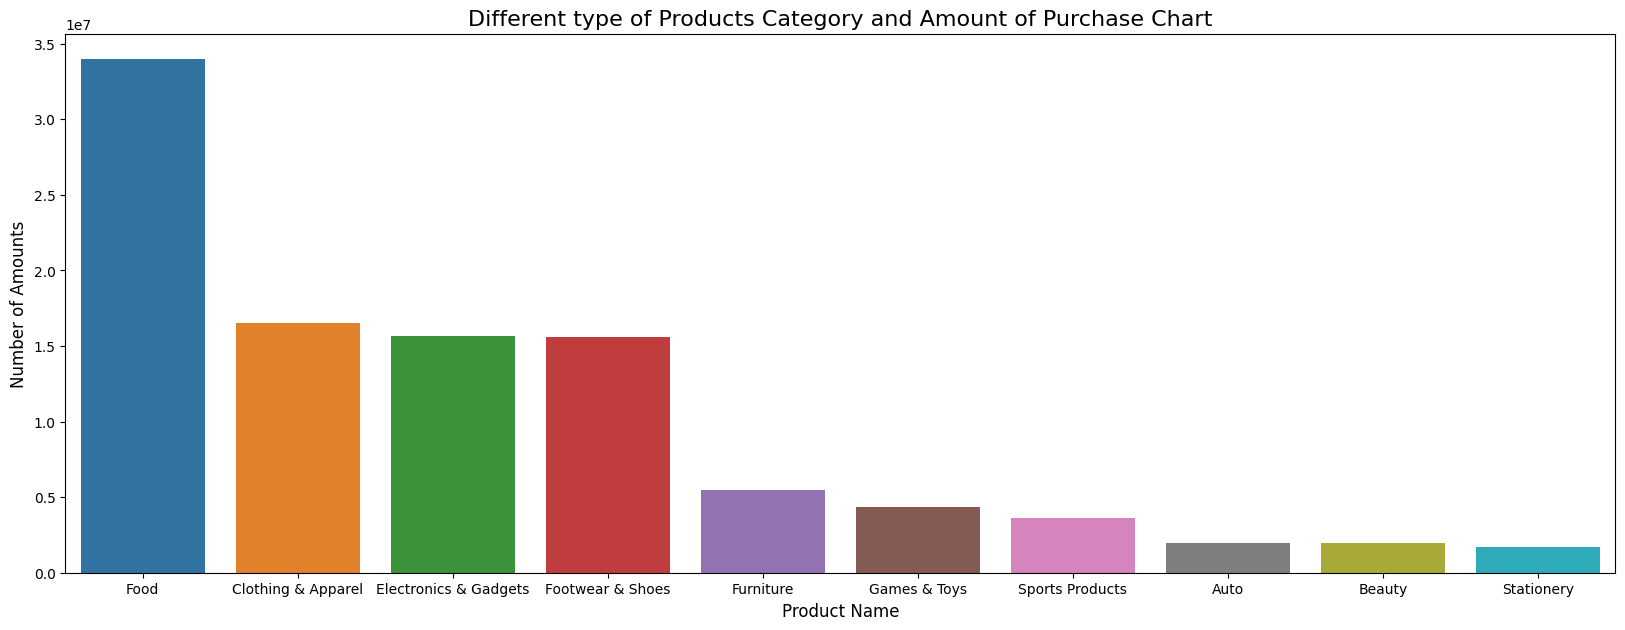

In [ ]:
State= DS.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
paper= plt.figure(figsize=[20,7])


sns.barplot(data=State, x='Product_Category', y='Amount')
plt.title('Different type of Products Category and Amount of Purchase Chart', size=16)
plt.xlabel('Product Name', size=12)
plt.ylabel('Number of Amounts', size=12)
plt.show()


### **EDA Observation 6**
  **1. People tend to spend the most time purchasing clothing, followed by food, and then electronic gadgets.**

  **2. The lowest purchasing trend is observed for 'Hand & Power'.**
  
  **3.The sequence states that food spending is followed by clothing spending, followed by electronic gadget spending.**










```
# This is formatted as code
```


###**5.6 Product ID**

In [ ]:
DS['Product_ID'].nunique()

2351

Text(0.5, 1.0, 'Top Product ID and Order Count')

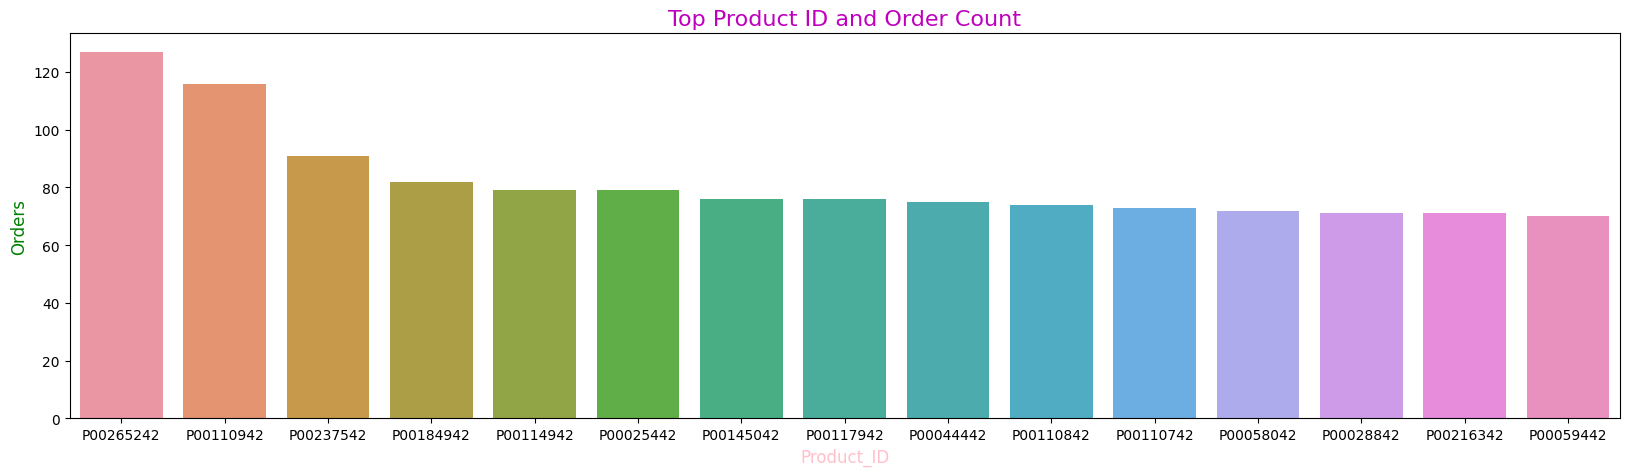

In [ ]:
ID= DS.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(15)
paper=plt.figure(figsize=[20, 5])
sns.barplot(data= ID, x='Product_ID', y='Orders')
plt.xlabel('Product_ID', size=12, color='pink')
plt.ylabel('Orders', size=12, color='g')
plt.title('Top Product ID and Order Count', size=16, color='m')


###**5.6 Heatmap**

### **EDA Observation 6**
  **1. Identify the top 15 highest-purchased products by their product IDs. This analysis will help us understand which products are most frequently purchased.**



##**6. Summary**

**<h4>Conclusion</h4>**
**1. Age Group Purchasing Behavior:**

The age group 26-35 shows the highest frequency in purchases.

**2.State-wise Purchase Trends:**

Uttar Pradesh exhibits the highest purchase frequency, followed by Maharashtra and Karnataka.

**3.Occupation Preferences:**

Individuals predominantly working in the IT sector have the highest purchasing activity.

**4.Category-wise Spending:**

The highest spending is observed in the food category, followed by clothing.
Electronics come in third in terms of spending.

**5.Purchase Preferences by Category:**

Clothing purchases rank higher than food purchases, followed by electronics.

**6.Lowest Purchasing Trend:**

'Hand & Power' category displays the lowest purchasing trend.

**7.Highest Purchasing state**

If referring to the number of purchases, Uttar Pradesh leads in total transactions.

